## 1. Data wrangling

This notebook contains the steps 3-4 to prepare the dataset for the modelling process:
1. Data collection 
2. Analysis and profiling
3. Quality check assesment
4. Data cleaning

Fistly, I will import the necessary packages

In [1]:
# Import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

---
### 1.3. Quality check assesment

This step involves checking for missing or inconsistent values within the variables. A visual inspection is used in the cell below to check for links  

In [2]:
# Import pre-processed dataset and load it into a dataframe

# Create path variable
file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/pre-selected.csv'

# Create dictionary with categorial variables to specify when loading csv in dataframe
cat_dict = {'COOLTYPE':'category',
            'EQUIPAGE':'category',
            'EQUIPM':'category',
            'FUELHEAT':'category',
            'IECC_CLIMATE_PUB':'category',
            'KOWNRENT':'category',
            'MONEYPY':'category',
            'ROOFTYPE':'category',
            'TYPEHUQ':'category',
            'STORIES':'category',
            'WALLTYPE':'category',
            'YEARMADERANGE':'category',
              }

# Load csv in dataframe
df = pd.read_csv(file, index_col=0, dtype=cat_dict)

In [3]:
# Inspect number of observations and variables

df.shape

(5686, 36)

In [4]:
# Print sample

df.head()

,ATTIC,ATTICFIN,BASEFIN,BEDROOMS,CDD30YR,CDD65,CELLAR,COOLTYPE,DOLELCOL,DOLLAREL,...,STORIES,SWIMPOOL,TOTALDOLSPH,TOTSQFT_EN,TOTROOMS,TYPEHUQ,WALLTYPE,YEARMADERANGE,DOLELLGT,TOTALDOLWTH
0,0.0,NaN,NaN,3,1332.0,1768.0,0.0,Central AC,365.46,967.23,...,2,0.0,176.59,1808.0,7,Detached house,Stucco,2000-2009,75.18,248.33
1,0.0,NaN,NaN,2,2494.0,2795.0,0.0,Individual units,249.54,1366.00,...,1,0.0,380.52,759.0,4,Detached house,Siding,1980-1989,124.51,234.49
2,0.0,NaN,1.0,4,2059.0,2235.0,1.0,Both central and individual,844.63,2428.08,...,1,0.0,601.17,2288.0,9,Detached house,Wood,1970-1979,113.33,250.71
3,0.0,NaN,1.0,3,1327.0,1374.0,1.0,Central AC,471.13,1313.12,...,1,0.0,863.46,2573.0,7,Detached house,Siding,1950-1959,64.58,114.62
4,1.0,0.0,0.0,3,871.0,993.0,1.0,Central AC,62.05,581.07,...,2,0.0,67.87,1024.0,6,Detached house,Brick,1970-1979,112.65,220.26


In the next cell, it can be seen the density and distribution of missing values (NaN) thoughout the full dataset. 

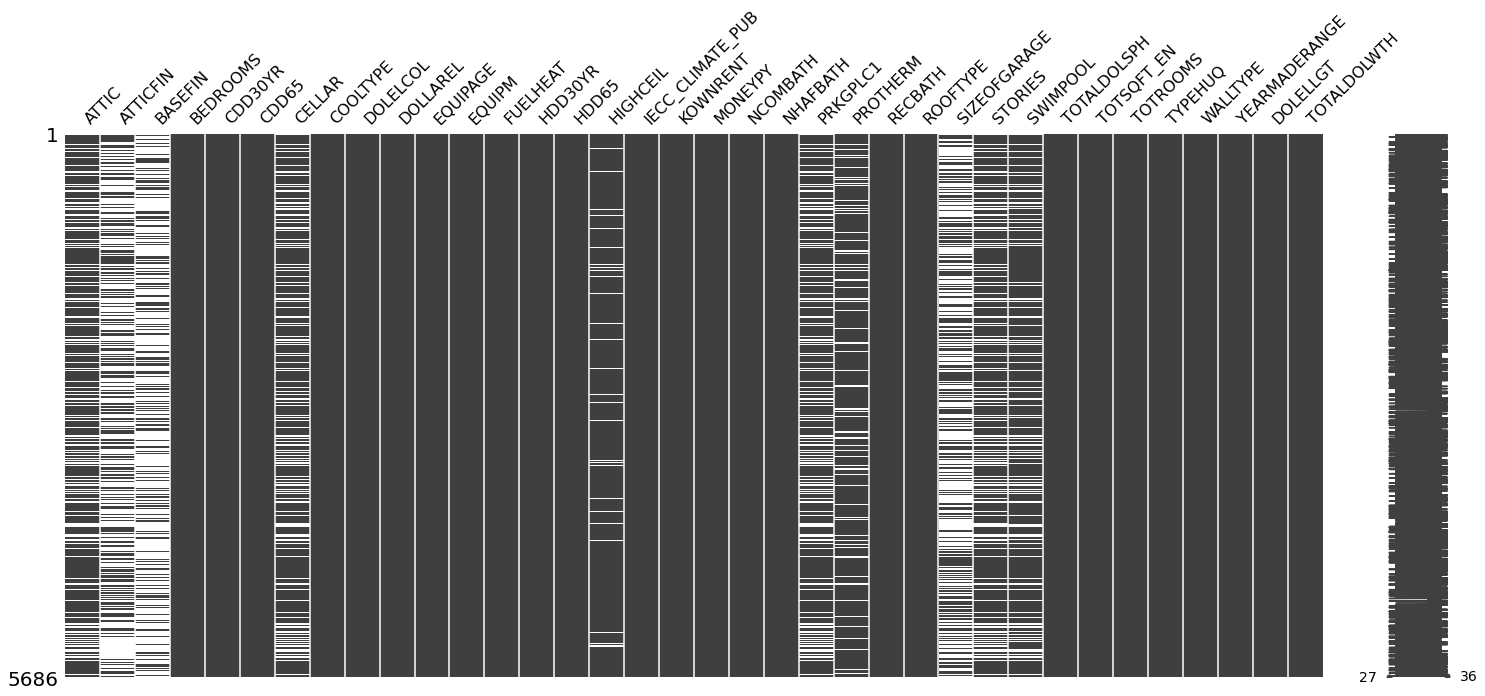

In [5]:
# Visualize missigness density and distribution

m = msno.matrix(df)
plt.show()

As expected, some variables present scattered missing values, since "-2" (Non-applicable) values were substituted by NaN values in previous steps.

The next two cells present same graph but sorted by unit type and climate respectively. The goal is to find out if these missing values are distributed random-wise or are consistent with other classification: 

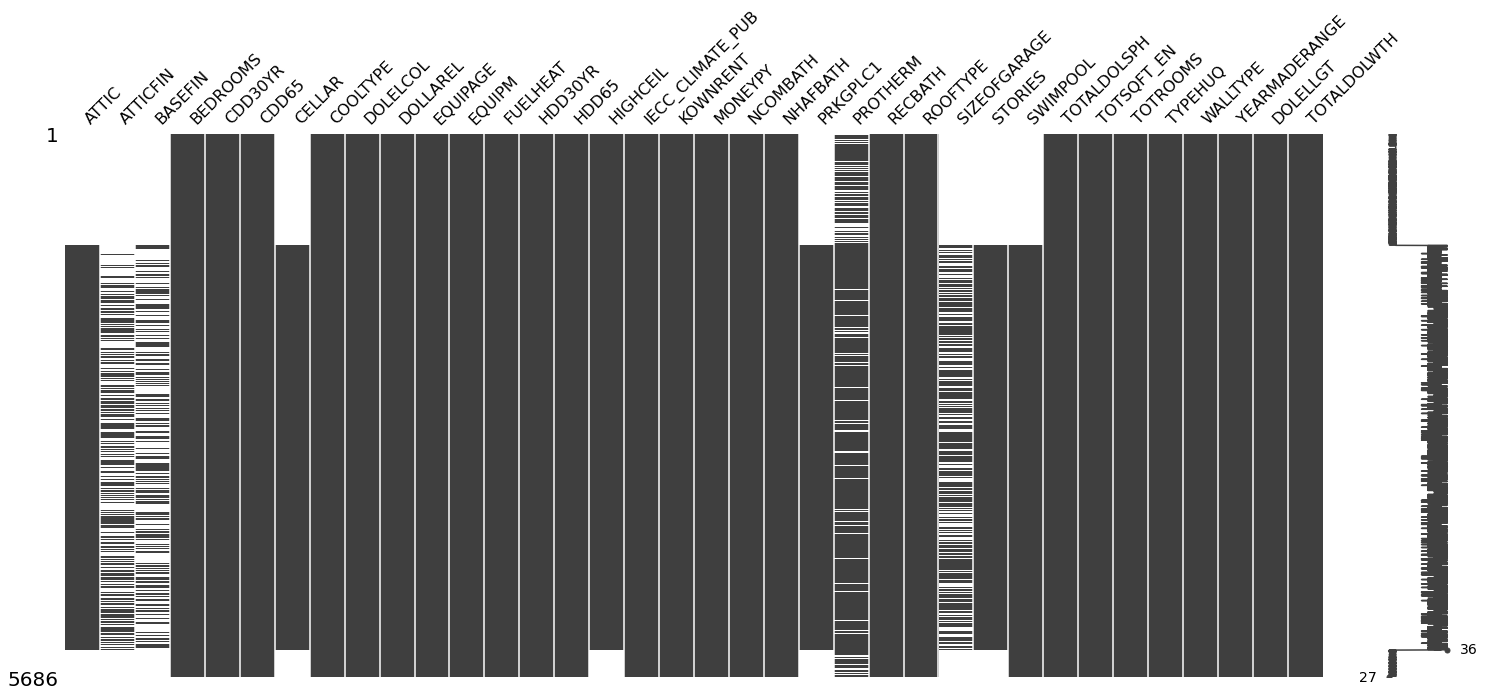

In [6]:
# Visualize missigness density and distribution by unit type

df_byTYPEHUQ = df.sort_values(by='TYPEHUQ')

m = msno.matrix(df_byTYPEHUQ)
plt.show()

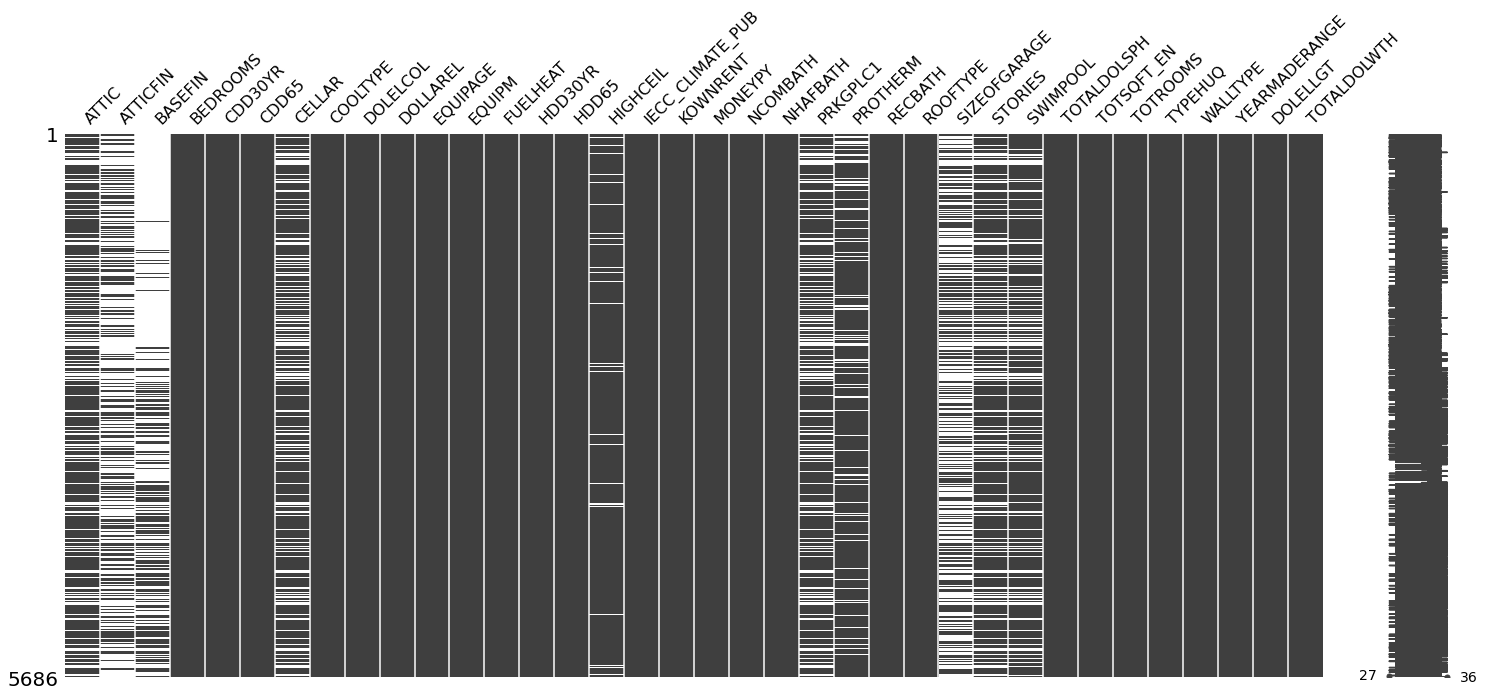

In [7]:
# Visualize missigness density and distribution by unit type

df_byCLIMATE = df.sort_values(by='IECC_CLIMATE_PUB')

m = msno.matrix(df_byCLIMATE)
plt.show()

It seems that most of these NaN values correspond to construction features that make sense only in certain types of units, i.e. Condo units cannot have basement or attic. 

Final data inspection:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5685
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ATTIC             4231 non-null   float64 
 1   ATTICFIN          2274 non-null   float64 
 2   BASEFIN           1741 non-null   float64 
 3   BEDROOMS          5686 non-null   int64   
 4   CDD30YR           5686 non-null   float64 
 5   CDD65             5686 non-null   float64 
 6   CELLAR            4231 non-null   float64 
 7   COOLTYPE          5686 non-null   category
 8   DOLELCOL          5686 non-null   float64 
 9   DOLLAREL          5686 non-null   float64 
 10  EQUIPAGE          5686 non-null   category
 11  EQUIPM            5686 non-null   category
 12  FUELHEAT          5686 non-null   category
 13  HDD30YR           5686 non-null   float64 
 14  HDD65             5686 non-null   float64 
 15  HIGHCEIL          5400 non-null   float64 
 16  IECC_CLIMATE_PUB  5686 n

---

### 1.4. Data cleaning

In this section NaN values will be replaced or removed according to its meaning and nature. For our dataset, the best option to deal with missing entries is to replace them with "0" value, representing the standard benchmark for the attributes in most cases. 

In [9]:
# Replace NaN values by 0 in selected variables

df.ATTIC.fillna(0, inplace=True)
df.ATTICFIN.fillna(0, inplace=True)
df.BASEFIN.fillna(0, inplace=True)
df.CELLAR.fillna(0, inplace=True)
df.PRKGPLC1.fillna(0, inplace=True)
df.SIZEOFGARAGE.fillna(0, inplace=True)
df.PROTHERM.fillna(0, inplace=True)
df.SWIMPOOL.fillna(0, inplace=True)
df.HIGHCEIL.fillna(0, inplace=True)

# In the case of STORIES variable (categorical) NaN values are replaced by 1, assuming a baseline of 1.

df.STORIES.fillna('1', inplace=True) 

A simple boxplot is used to find values out of the interquartile range (outliers):

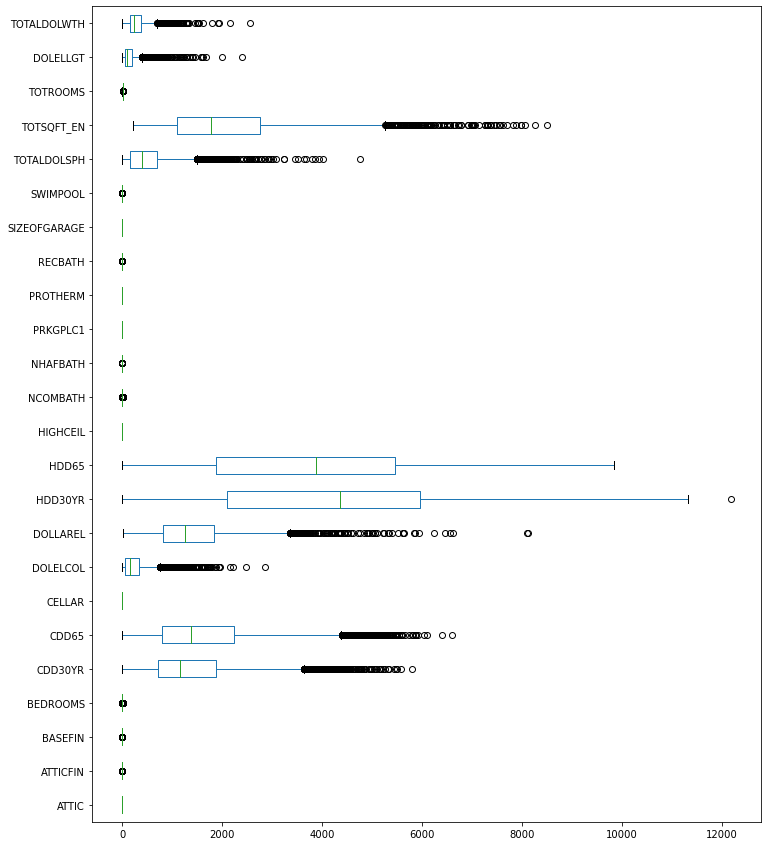

In [10]:
# Select non-categorical variables
df_numeric = df.loc[:, df.dtypes != 'category']

# Plot boxplot for all selected variables
df_numeric.boxplot(grid=False, vert=False, fontsize=10, figsize=(12,15))
plt.show()

It can be observed a number of outliers in most of the continuous variables which have right long tailed distribution as shown in the previous notebook. 

Instead of removing these extremes data points, a better approach is to apply logarithmic data transformation to de-emphasizes outliers and obtain a potential bell-shaped distribution by restoring the symmetry. This transformation will be applied in the next notebook about exploratory data analysis of variables.

In [11]:
# Apply log transformation to continuous variables with right long tail

df['TOTALDOLWTH_log'] = np.log(df.loc[:, 'TOTALDOLWTH'])
df['TOTALDOLWTH_log'].replace(-np.inf, 0, inplace=True) # Remove -inf values generated by log(0)

df['DOLELLGT_log'] = np.log(df.loc[:, 'DOLELLGT'])

df['TOTSQFT_EN_log'] = np.log(df.loc[:, 'TOTSQFT_EN'])

df['TOTALDOLSPH_log'] = np.log(df.loc[:, 'TOTALDOLSPH'])
df['TOTALDOLSPH_log'].replace(-np.inf, 0, inplace=True) # Remove -inf values generated by log(0)

df['DOLLAREL_log'] = np.log(df.loc[:, 'DOLLAREL'])

df['DOLELCOL_log'] = np.log(df.loc[:, 'DOLELCOL'])
df['DOLELCOL_log'].replace(-np.inf, 0, inplace=True) # Remove -inf values generated by log(0)

C:\Users\javie\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Finally, the processed data is stored as a csv file

In [12]:
# Write df dataframe to csv

path = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/processed/clean.csv'

df.to_csv(path)